In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
sales_data = pd.read_csv('/Users/adityabisht/Downloads/Python Portfolio/Python Foundation Case Study 4 - Python Visualization Case Study/SalesData.csv')

In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [4]:
sales_data.groupby('Region')[['Sales2015','Sales2016']].sum()

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


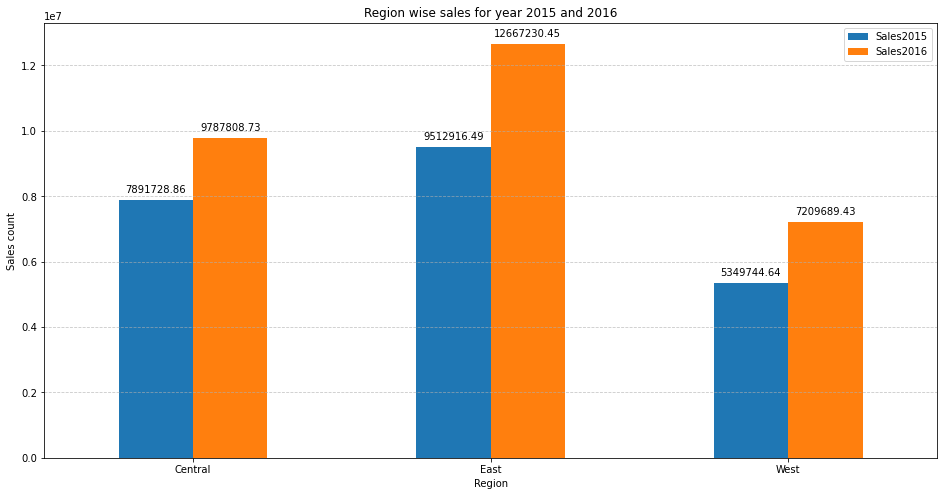

In [5]:


sales_data.groupby('Region')[['Sales2015','Sales2016']].sum().plot(kind='bar',rot=0,figsize=(16,8))
plt.title('Region wise sales for year 2015 and 2016')
plt.ylabel('Sales count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()
    

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [6]:
sales_by_region = sales_data.groupby('Region')['Sales2016'].sum()
sales_by_region

Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64

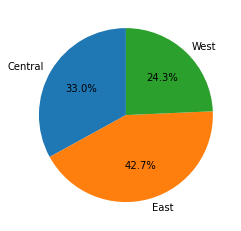

In [7]:
sales_by_region.plot(kind='pie',autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()


### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [8]:
tot_sales_15_16 = sales_data.pivot_table(index=['Region','Tier'],values=['Sales2015','Sales2016'],aggfunc='sum')
tot_sales_15_16

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

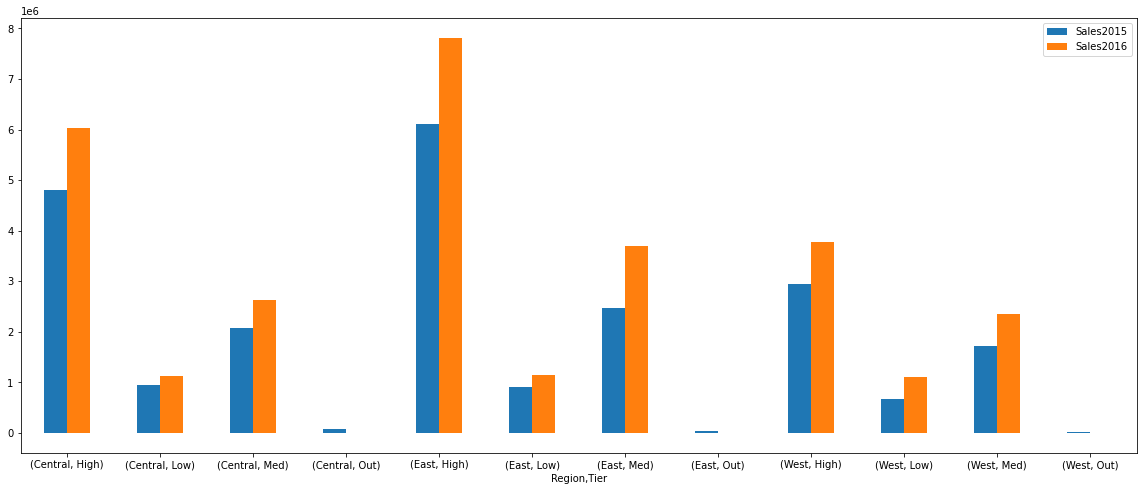

In [9]:
tot_sales_15_16.plot(kind='bar',figsize=(20,8),rot=0)




plt.show()


### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [10]:
east = sales_data[sales_data.Region == 'East']
east

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0,4.0,1.03,1.45
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,7239,Account2716,East,MINUTEMEN,BOSTON N,MA,High,Dec,3128.34,3128.34,1.0,1.0,1.08,1.10
3695,7920,Account2725,East,ORION,SAINT PETERSBURG,FL,Med,Nov,0.00,16163.05,0.0,5.0,0.77,1.18
3700,1174604,Account2733,East,BIG APPLE,BROOKLYN,NY,Out,May,7368.96,0.00,2.0,0.0,1.34,1.04
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14


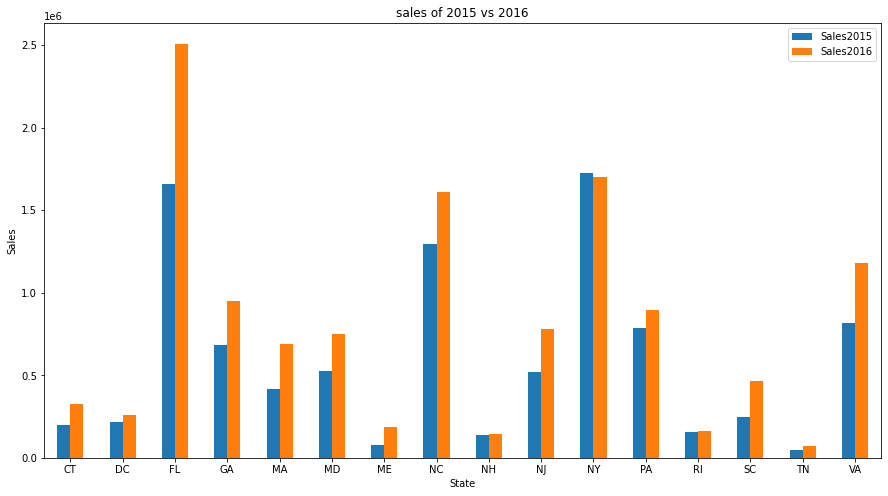

the state NY registered the decline in sales in the year 2016


In [11]:
east.groupby('State')[['Sales2015','Sales2016']].sum().plot(kind='bar',figsize=(15,8),rot=0)
plt.ylabel('Sales')
plt.title('sales of 2015 vs 2016')
plt.show()
print('the state NY registered the decline in sales in the year 2016')

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [12]:
high = sales_data[sales_data.Tier == 'High']
high

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0000,4.0,1.03,1.45
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0000,17.0,1.08,0.99
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0000,4.0,1.11,1.54
10,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Feb,9640.17,27316.66,3.0000,10.0,1.06,1.08
17,2426,Account13,East,BIG APPLE,PATERSON,NJ,High,Oct,0.00,3128.34,0.0000,1.0,1.42,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3699,3048,Account2731,Central,RACEWAY,OWENSBORO,KY,High,Mar,9890.91,0.00,4.0000,0.0,0.79,1.39
3701,7076,Account2735,Central,WRANGLER,HOUSTON S,TX,High,Nov,-11053.44,0.00,-3.0000,0.0,0.92,1.26
3702,7076,Account2735,Central,WRANGLER,HOUSTON S,TX,High,Jul,3919.19,0.00,1.0000,0.0,1.08,1.42
3703,7076,Account2735,Central,WRANGLER,HOUSTON S,TX,High,Oct,22575.87,0.00,5.9999,0.0,1.03,1.13


In [13]:
high.groupby('Division')[['Units2015','Units2016']].sum()

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


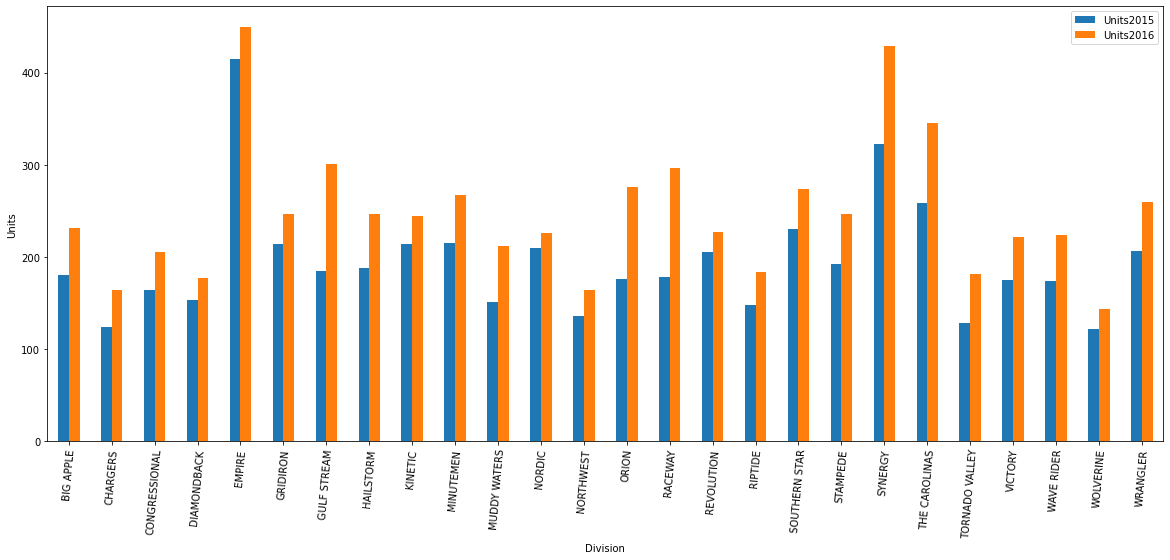

No Division saw decline in units as compared to year 2015


In [14]:
high.groupby('Division')[['Units2015','Units2016']].sum().plot(kind='bar',figsize=(20,8),rot=85)
plt.ylabel('Units')
plt.show()
print('No Division saw decline in units as compared to year 2015')

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
    • Jan - Mar : Q1
    • Apr - Jun : Q2
    • Jul - Sep : Q3
    • Oct - Dec : Q4

In [15]:

sales_data['Qtr'] = np.where(sales_data['Month'].isin(['Jan', 'Feb', 'Mar']), 'Q1',
                             np.where(sales_data['Month'].isin(['Apr', 'May', 'Jun']), 'Q2',
                                      np.where(sales_data['Month'].isin(['Jul', 'Aug', 'Sep']), 'Q3',
                                               np.where(sales_data['Month'].isin(['Oct', 'Nov', 'Dec']), 'Q4', None)
                                              )
                                     )
                            )


In [16]:
sales_data

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [17]:
sales_data.groupby('Qtr')[['Sales2015','Sales2016']].sum()

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


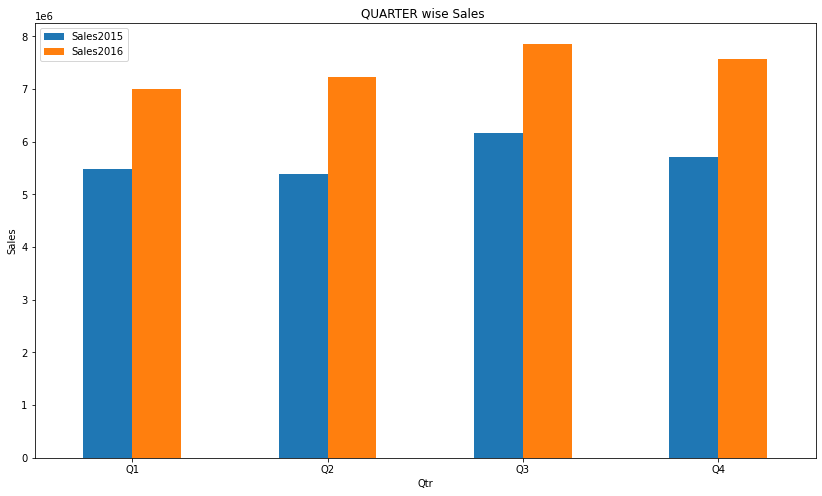

In [18]:
sales_data.groupby('Qtr')[['Sales2015','Sales2016']].sum().plot(kind='bar',rot=0,figsize=(14,8))
plt.title('QUARTER wise Sales ')
plt.ylabel('Sales')
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
(Draw 4 pie charts representing a Quarter for each Tier)

In [19]:
data = abs(sales_data.pivot_table(index='Qtr',columns='Tier',values='Sales2016',aggfunc='sum'))
data

Tier,High,Low,Med,Out
Qtr,,,,
Q1,3867718.595,948832.77,2.181402e+06,0.00
Q2,4130952.560,890594.75,2.215814e+06,0.00
Q3,4872559.250,795177.71,2.197058e+06,3248.53
Q4,4740001.985,742659.39,2.085207e+06,0.00


In [20]:
data.index

Index(['Q1', 'Q2', 'Q3', 'Q4'], dtype='object', name='Qtr')

In [21]:
data.columns

Index(['High', 'Low', 'Med', 'Out'], dtype='object', name='Tier')

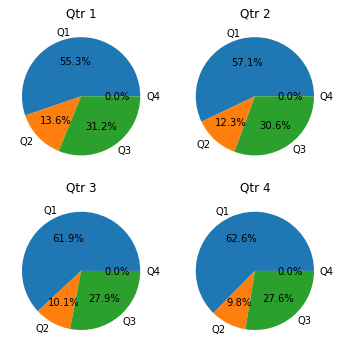

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))
quarters = data.index

for i, ax in enumerate(axes.flat):
    # Extracting data from the current quarter
    current_quarter_data = data.iloc[i, :]
    
    # Plot a pie chart for the current quarter
    ax.pie(current_quarter_data, labels=data.index, autopct='%1.1f%%')
    
    # Set title for each subplot
    ax.set_title(f'Qtr {i+1}')

plt.tight_layout()
plt.show()